# Keras Classification Example

### Here is an example notebook on how to classify a physics signal and background using keras

### Our signal here is the higgs decay to 2 e and 2 mu and our background is zz -> 2e 2 mu. This is quite an easy example to classify(cutbased will suffice) if you use the 4l invariant mass variable(higgs will peak at 125 and zz will peak at 180 GeV). But to make our problem non trivial , we will not be using the 4 l mass variable or any variations of it. 

## Loading data 

Our first task will be to load our input signal and background output files(which are root ntuples)into a format that could that could be readable(pandas dataframe or numpy array) by our machine learning packages. For this we will be using uproot3. uproot is a cool new tool to read and write root files into numpy and dataframe formats,It has many other great functionalities. see https://masonproffitt.github.io/uproot-tutorial/aio.html for a tutorial on how to get started with uproot. 

In [1]:
%matplotlib inline

import random

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import uproot3


Now lets load our signal file

In [3]:
signal = uproot3.open("test_signal.root")

Now lets see whats inside this file

In [4]:
signal.keys()

[b'Events;1']

We can see that there is one key: “Events”. This doesn’t tell us what kind of object it refers to, though. ROOT files can contain many different types of objects, including subdirectories. The following function provides a way to inspect the types of each item:

In [5]:
signal.classnames()

[(b'Events;1', 'TTree')]

We can see that Events is a root TTree object. lets load it and see whats inside

In [6]:
signal['Events']

<TTree b'Events' at 0x7fe92ff39890>

In [7]:
signal['Events'].keys()

[b'Muon_pt_1',
 b'Muon_pt_2',
 b'Electron_pt_1',
 b'Electron_pt_2',
 b'dPhim1e1',
 b'dPhim1e2',
 b'dPhim2e1',
 b'dPhim2e2',
 b'Electron_eta_1',
 b'Electron_eta_2',
 b'Muon_eta_1',
 b'Muon_eta_2',
 b'dPhim1m2',
 b'dPhie1e2']

So now we can see that the file events contain all the variables that we are going to use for our classification problem. If these steps are clear to you , you can now directly load the Events tree as our signal and inspect the keys.

In [8]:
signal = uproot3.open("test_signal.root")["Events"]

In [9]:
signal.keys()

[b'Muon_pt_1',
 b'Muon_pt_2',
 b'Electron_pt_1',
 b'Electron_pt_2',
 b'dPhim1e1',
 b'dPhim1e2',
 b'dPhim2e1',
 b'dPhim2e2',
 b'Electron_eta_1',
 b'Electron_eta_2',
 b'Muon_eta_1',
 b'Muon_eta_2',
 b'dPhim1m2',
 b'dPhie1e2']

In [10]:
#df["Muon_pt_2"] > 1000


In [11]:
#df = df[df["Muon_pt_2"] > 1000].reset_index(drop=True)

### Now let us convert our signal into a pandas dataframe. 

In [12]:
df_signal = signal.pandas.df(["Muon_*","Elec*","dPhi*"])

Lets see what this looks like

In [13]:
df_signal

,Muon_pt_1,Muon_pt_2,Muon_eta_1,Muon_eta_2,Electron_pt_1,Electron_pt_2,Electron_eta_1,Electron_eta_2,dPhim1e1,dPhim1e2,dPhim2e1,dPhim2e2,dPhim1m2,dPhie1e2
entry,,,,,,,,,,,,,,
0,17.382437,13.238400,-0.287998,-2.505396,44.744175,58.942070,-0.440202,-1.174093,0.859931,2.731727,-4.039423,-2.167627,4.899354,1.871796
1,50.051613,41.024353,0.437299,0.728018,15.959146,5.622648,1.032079,0.413351,0.237984,-3.473453,3.290306,-0.421131,-3.052322,-3.711437
2,24.702271,41.462658,1.642034,-0.360378,5.042018,7.994947,-1.505692,1.702696,-0.474739,2.842660,-1.923548,1.393850,1.448810,3.317399
3,55.392330,32.569691,1.291607,0.371377,16.479095,14.080798,0.810022,1.582687,3.420421,-1.231367,0.012445,-4.639343,3.407976,-4.651788
4,37.216637,54.203739,-0.496596,-0.919289,14.535382,17.012287,-0.030889,-0.248747,-5.228100,-2.087943,-2.184106,0.956050,-3.043994,3.140156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22833,15.948185,10.853278,-1.940742,-0.911976,34.428360,56.252823,-0.706417,-1.421783,-2.957020,0.655409,-0.654651,2.957778,-2.302369,3.612429
22834,3.165293,7.369295,-1.285632,1.799208,27.072086,28.327864,-0.561875,0.056757,2.343978,-1.643248,5.134007,1.146782,-2.790029,-3.987226
22835,33.588539,35.164211,1.337266,-0.353645,14.531511,12.232145,0.601156,1.065312,2.422990,0.937451,-1.290169,-2.775708,3.713160,-1.485539


###  Now we have converted our root tree object("Events") into a beautiful pandas dataframe with all the variables and event number. 

Lets get a summary of the variables

In [14]:
df_signal.describe()

,Muon_pt_1,Muon_pt_2,Muon_eta_1,Muon_eta_2,Electron_pt_1,Electron_pt_2,Electron_eta_1,Electron_eta_2,dPhim1e1,dPhim1e2,dPhim2e1,dPhim2e2,dPhim1m2,dPhie1e2
count,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000
mean,25.416233,25.856043,-0.060940,0.044795,27.828766,27.024536,-0.000032,-0.010853,-0.198926,-0.173602,0.163665,0.188990,-0.362592,0.025324
std,20.175316,20.824598,1.362006,0.970735,19.637856,20.663986,1.050571,1.287738,2.602724,2.565942,2.573566,2.569385,2.700612,2.793241
min,3.001633,3.001062,-2.514854,-5.712338,5.002392,5.000097,-2.655886,-2.643006,-6.253033,-6.245044,-6.240183,-6.180146,-6.250220,-6.153236
25%,11.204918,11.130641,-1.273503,-0.618434,12.814576,11.535241,-0.747693,-1.010554,-2.173883,-2.112524,-1.717286,-1.695825,-2.733001,-2.617669
50%,20.172464,20.315402,-0.103297,0.047480,23.230130,21.772771,-0.005856,-0.017412,-0.222699,-0.170336,0.163635,0.188287,-0.610807,0.065766
75%,35.780353,36.665321,1.189701,0.704413,39.005567,38.129457,0.738066,0.987355,1.696562,1.689047,2.126038,2.144181,2.089295,2.664267
max,650.410767,433.609955,2.491697,3.152850,269.401245,302.362274,2.638832,2.621549,6.223757,6.254736,6.259244,6.223243,6.225653,6.197930


### Now lets do the same for background

In [15]:
background = uproot3.open("test_background.root")["Events"]

In [16]:
df_background = background.pandas.df(["Mu*","Ele*","dPhi*"])

In [17]:
df_background.describe()

,Muon_pt_1,Muon_pt_2,Muon_eta_1,Muon_eta_2,Electron_pt_1,Electron_pt_2,Electron_eta_1,Electron_eta_2,dPhim1e1,dPhim1e2,dPhim2e1,dPhim2e2,dPhim1m2,dPhie1e2
count,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000,131384.000000
mean,28.916653,28.885139,-0.042383,0.038036,31.968166,32.504166,-0.003966,0.004052,-0.167671,-0.138970,0.098707,0.127410,-0.266382,0.028703
std,29.118668,64.374405,1.391685,1.048500,26.931080,28.713284,1.124343,1.333354,2.654039,2.655514,2.617703,2.625995,2.548379,2.715871
min,3.000166,3.000157,-5.696682,-4.053686,5.000047,5.000191,-2.676136,-2.654118,-6.260075,-6.277071,-6.261344,-6.261574,-6.277163,-6.262017
25%,9.061773,7.824332,-1.294580,-0.699660,13.454914,12.663032,-0.821138,-1.072187,-2.412053,-2.396323,-2.036037,-2.049057,-2.377479,-2.546266
50%,20.908807,19.833357,-0.073071,0.044886,26.475896,26.501304,-0.000442,0.002865,-0.158305,-0.128462,0.076944,0.103246,-0.288105,0.034173
75%,39.534593,39.247039,1.236784,0.777958,41.454762,42.257981,0.813468,1.086277,2.000439,2.071269,2.280156,2.363670,1.581809,2.605508
max,1897.867920,16244.873047,2.510320,5.592937,598.043518,677.865173,2.664995,2.669436,6.268476,6.246774,6.275122,6.254691,6.257235,6.264532


### We can see that there are about 22k signal and 131k background events. The number of background events outnumber the signal events by a factor of 6. This is called class imbalance and you will come across them many times in your physics analyses. We will see how to deal with this later in the notebook

 So now have our signal and background events in seperate dataframes(df_signal and df_background). Lets assign a target value 1 for signal and 0 for background and combine them to a single dataframe.

In [18]:
df_signal=df_signal.assign(y=1)
df_background =df_background.assign(y=0)

In [19]:
df_list = [df_signal,df_background]

In [20]:
df = pd.concat(df_list)

In [21]:
df.describe()

,Muon_pt_1,Muon_pt_2,Muon_eta_1,Muon_eta_2,Electron_pt_1,Electron_pt_2,Electron_eta_1,Electron_eta_2,dPhim1e1,dPhim1e2,dPhim2e1,dPhim2e2,dPhim1m2,dPhie1e2,y
count,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000,154222.000000
mean,28.398205,28.436342,-0.045131,0.039037,31.354895,31.692554,-0.003383,0.001845,-0.172299,-0.144098,0.108326,0.136530,-0.280626,0.028203,0.148085
std,28.002783,59.964813,1.387333,1.037346,26.021982,27.737486,1.113720,1.326695,2.646499,2.642440,2.611283,2.617743,2.571698,2.727440,0.355186
min,3.000166,3.000157,-5.696682,-5.712338,5.000047,5.000097,-2.676136,-2.654118,-6.260075,-6.277071,-6.261344,-6.261574,-6.277163,-6.262017,0.000000
25%,9.379567,8.271853,-1.291891,-0.687472,13.340180,12.444839,-0.810923,-1.063239,-2.377478,-2.354767,-1.986600,-1.995174,-2.451504,-2.557987,0.000000
50%,20.754837,19.918246,-0.077602,0.045477,26.018016,25.750870,-0.001455,-0.000584,-0.167161,-0.133438,0.087897,0.114934,-0.312539,0.037915,0.000000
75%,38.886437,38.802670,1.229341,0.767774,41.076676,41.640589,0.802387,1.071124,1.948316,2.011682,2.256798,2.332557,1.666354,2.615443,0.000000
max,1897.867920,16244.873047,2.510320,5.592937,598.043518,677.865173,2.664995,2.669436,6.268476,6.254736,6.275122,6.254691,6.257235,6.264532,1.000000


So now we have combined our signal and background into a sigle dataframe using pd.concat. Lets plot these variables using matplotlib.

In [22]:
df.keys()

Index(['Muon_pt_1', 'Muon_pt_2', 'Muon_eta_1', 'Muon_eta_2', 'Electron_pt_1',
       'Electron_pt_2', 'Electron_eta_1', 'Electron_eta_2', 'dPhim1e1',
       'dPhim1e2', 'dPhim2e1', 'dPhim2e2', 'dPhim1m2', 'dPhie1e2', 'y'],
      dtype='object')

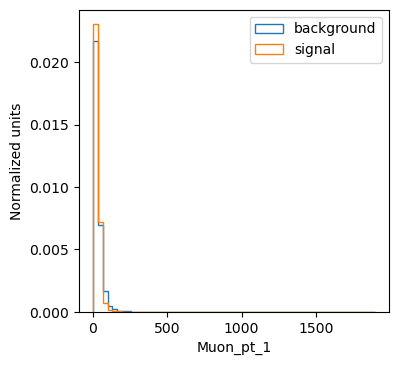

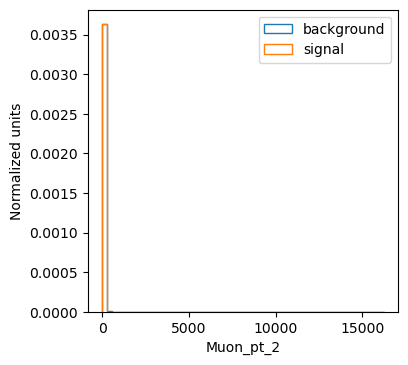

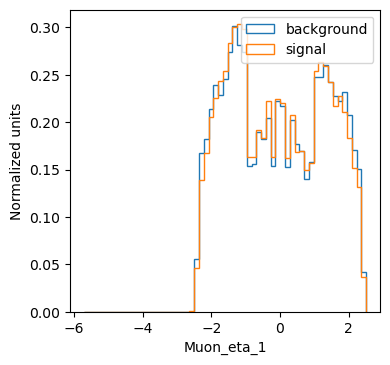

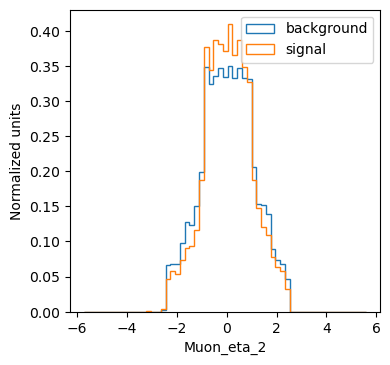

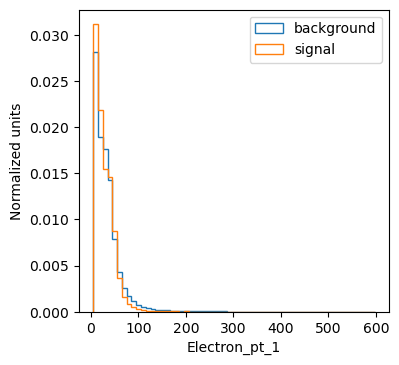

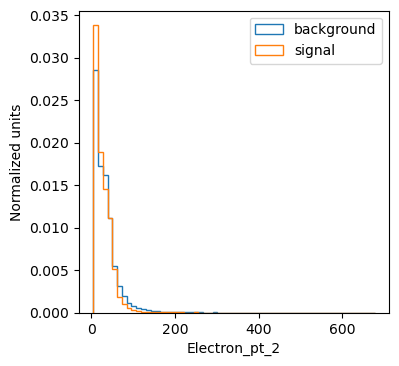

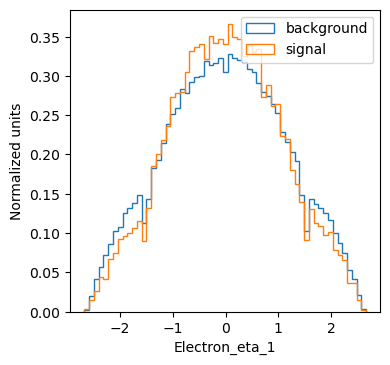

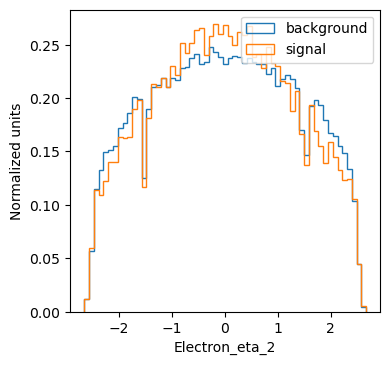

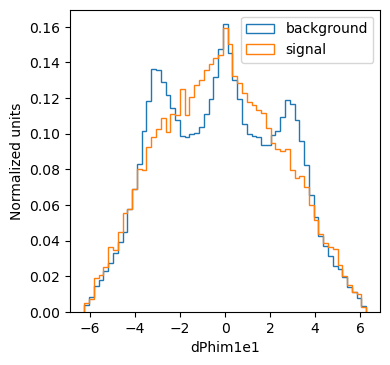

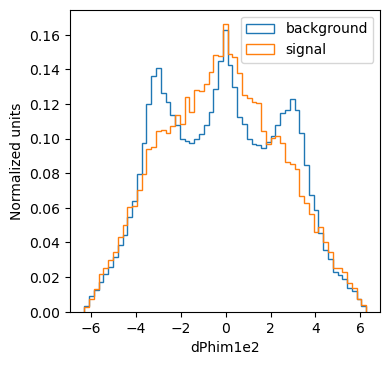

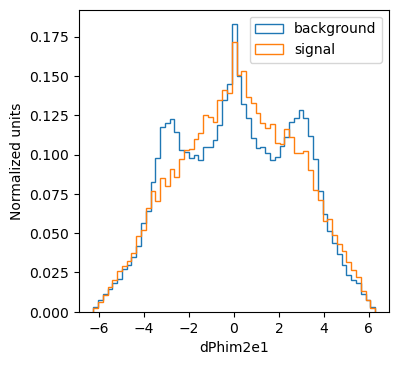

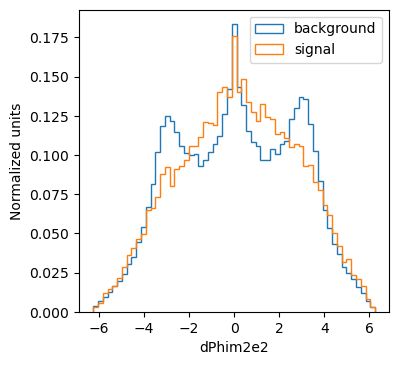

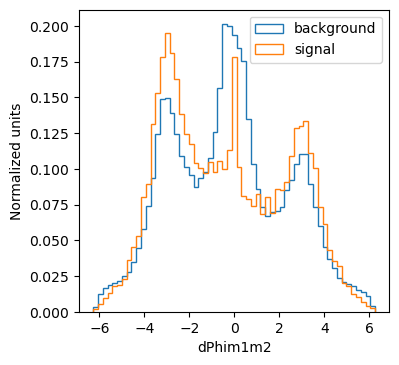

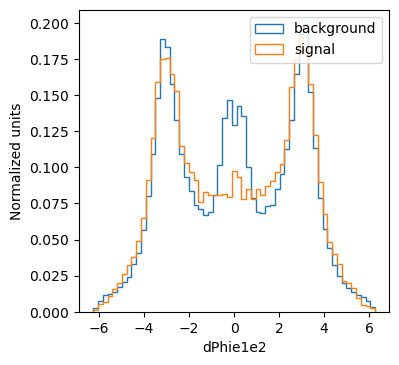

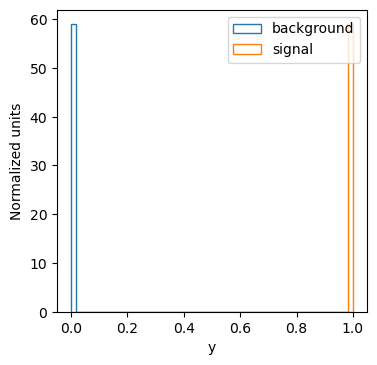

In [23]:
# iterate through the columns
for key in df.keys():
    # plotting settings
    #matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(4, 4), dpi=100)
    bins = np.linspace(min(df[key]), max(df[key]), 60)
    # plot!
    plt.hist(df[df.y<0.5][key], bins=bins, histtype='step',label='background',density=1)
    plt.hist(df[df.y>=0.5][key], bins=bins, histtype='step',label='signal',density=1)
    
    # decorate
    plt.xlabel(key)
    plt.ylabel('Normalized units')
    plt.legend()
    plt.plot()
    #plt.savefig("{}.png".format(key), bbox_inches="tight")



### why does the histogram plot of the 2nd variable(Muon_pt_2) like that?

Look at the output of df.describe().We can see that  some of the events have very high Muon_pt_2 values(more than 16TeV!) and the histogram range is designed from the lowest to highest value.So lets filter them out and remove them.

In [24]:
df[df.Muon_pt_2 > 2000]

,Muon_pt_1,Muon_pt_2,Muon_eta_1,Muon_eta_2,Electron_pt_1,Electron_pt_2,Electron_eta_1,Electron_eta_2,dPhim1e1,dPhim1e2,dPhim2e1,dPhim2e2,dPhim1m2,dPhie1e2,y
entry,,,,,,,,,,,,,,,
5228,4.208788,8106.250977,-2.245703,-1.577183,9.546288,27.538887,0.771941,-2.449863,-0.675205,1.452036,-2.216075,-0.088834,1.540870,2.127241,0
35244,62.786999,3824.355469,2.392660,0.689551,30.671440,71.384415,-1.743245,-1.944990,-4.731206,-2.022829,-0.361194,2.347184,-4.370012,2.708378,0
59810,23.953218,2385.304199,-1.130173,-1.075726,22.436277,19.743753,-1.980311,-1.853704,-0.345446,-1.445096,-0.539388,-1.639037,0.193941,-1.099650,0
96079,284.358887,16244.873047,-0.136434,-0.125323,18.092247,186.694839,-0.808466,-0.874930,-3.128815,-3.158883,-3.128729,-3.158797,-0.000086,-0.030068,0
112195,6.084890,7771.579102,-0.336300,2.339244,42.268147,47.633408,-0.812719,-0.702192,-1.132693,-3.870791,2.183401,-0.554697,-3.316094,-2.738098,0


We can see that about five events have Muon_pt_2 greater than 2000. lets remove them by inverting the condition.


In [25]:
df = df[df.Muon_pt_2 < 2000].reset_index(drop=True) # reset_index will rearrange the missing event indices

In [26]:
df

,Muon_pt_1,Muon_pt_2,Muon_eta_1,Muon_eta_2,Electron_pt_1,Electron_pt_2,Electron_eta_1,Electron_eta_2,dPhim1e1,dPhim1e2,dPhim2e1,dPhim2e2,dPhim1m2,dPhie1e2,y
0,17.382437,13.238400,-0.287998,-2.505396,44.744175,58.942070,-0.440202,-1.174093,0.859931,2.731727,-4.039423,-2.167627,4.899354,1.871796,1
1,50.051613,41.024353,0.437299,0.728018,15.959146,5.622648,1.032079,0.413351,0.237984,-3.473453,3.290306,-0.421131,-3.052322,-3.711437,1
2,24.702271,41.462658,1.642034,-0.360378,5.042018,7.994947,-1.505692,1.702696,-0.474739,2.842660,-1.923548,1.393850,1.448810,3.317399,1
3,55.392330,32.569691,1.291607,0.371377,16.479095,14.080798,0.810022,1.582687,3.420421,-1.231367,0.012445,-4.639343,3.407976,-4.651788,1
4,37.216637,54.203739,-0.496596,-0.919289,14.535382,17.012287,-0.030889,-0.248747,-5.228100,-2.087943,-2.184106,0.956050,-3.043994,3.140156,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154212,21.862818,19.073345,-1.055002,-2.164875,19.002207,5.763723,-0.690505,-1.157036,-2.024491,-1.485335,2.016119,2.555275,-4.040610,0.539156,0
154213,18.242289,3.407574,0.818265,-0.694935,9.947722,29.983360,-0.631561,1.908502,-1.794056,-4.249772,-3.328629,-5.784345,1.534573,-2.455716,0
154214,9.866125,13.998549,1.178619,-0.324961,47.307266,37.936897,-1.317964,-2.447798,-0.706247,2.634208,-4.888000,-1.547545,4.181753,3.340456,0
154215,7.254772,179.028061,1.636060,-0.428018,32.595039,192.233215,-1.635862,-0.484780,-2.097756,-1.938121,-2.892393,-2.732759,0.794637,0.159635,0


#### Now let us plot the variables again

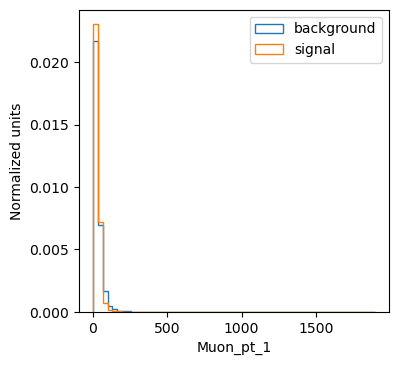

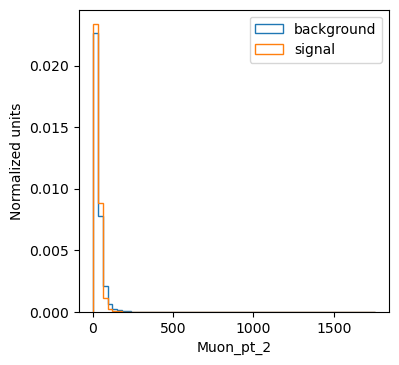

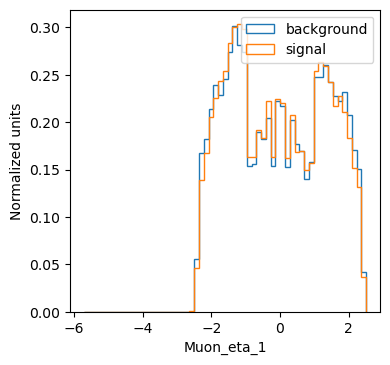

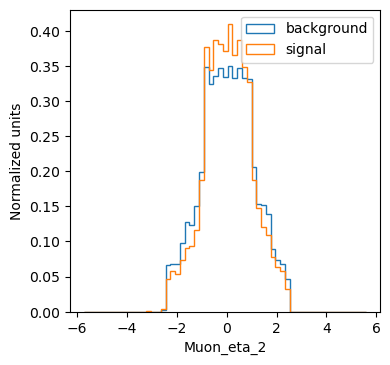

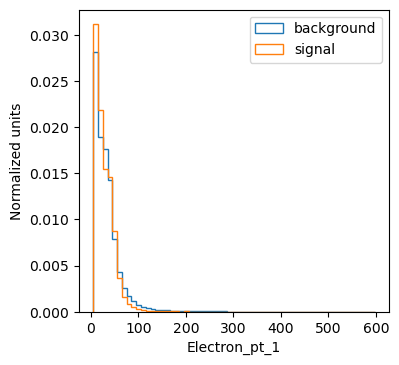

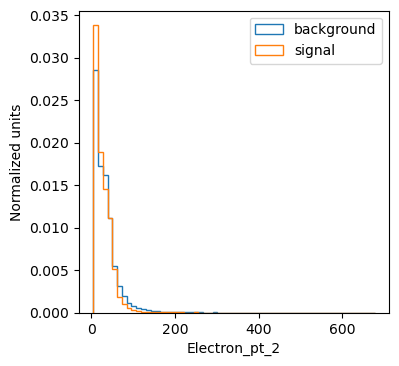

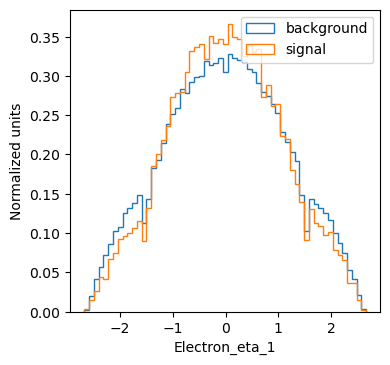

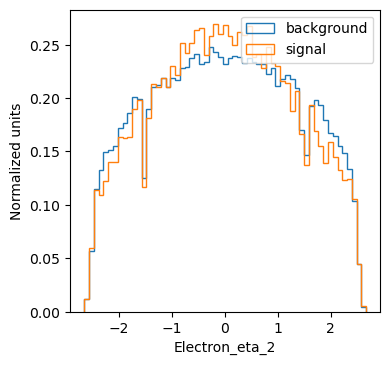

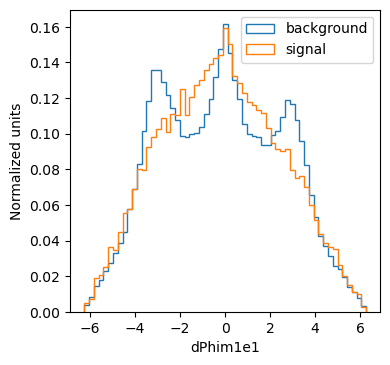

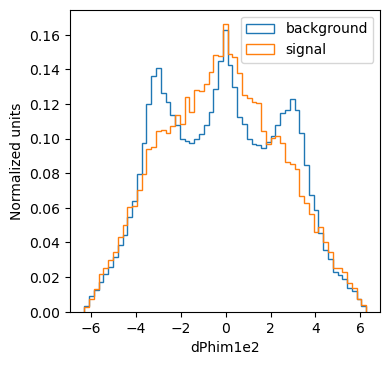

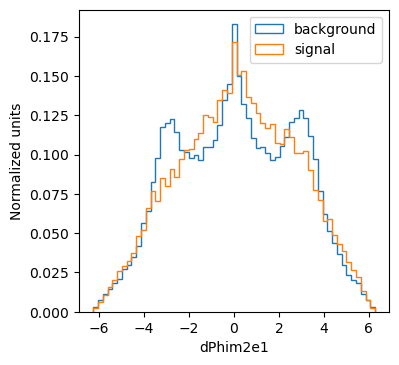

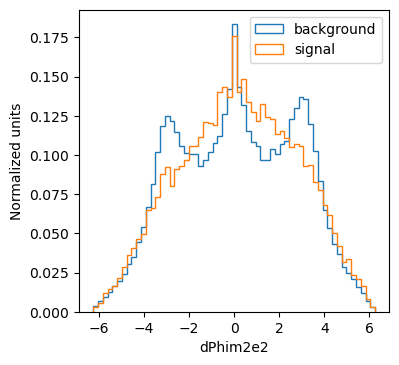

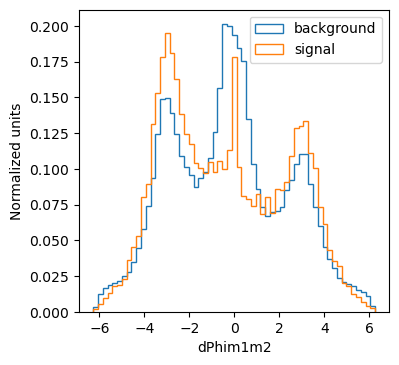

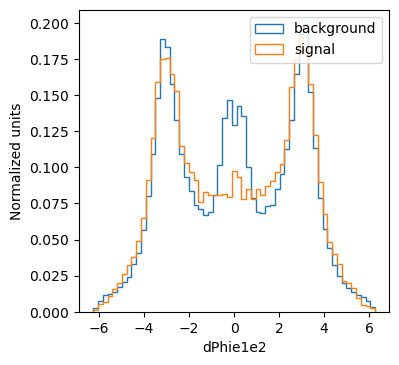

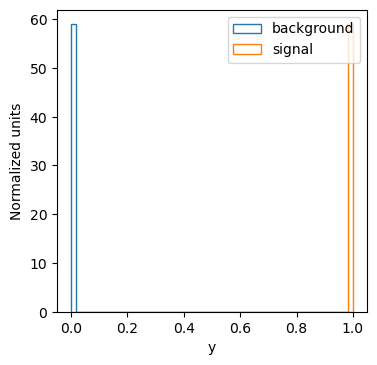

In [27]:
# iterate through the columns
for key in df.keys():
    # plotting settings
    #matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(4, 4), dpi=100)
    bins = np.linspace(min(df[key]), max(df[key]), 60)
    # plot!
    plt.hist(df[df.y<0.5][key], bins=bins, histtype='step',label='background',density=1)
    plt.hist(df[df.y>=0.5][key], bins=bins, histtype='step',label='signal',density=1)
    
    # decorate
    plt.xlabel(key)
    plt.ylabel('Normalized units')
    plt.legend()
    plt.plot()
    #plt.savefig("{}.png".format(key), bbox_inches="tight")

Nice! Now let us now create an input dataset(containing all the events) X and their labels y(1 or 0)


In [28]:
dataset = df.values

In [29]:
X = dataset[:,0:14] # since we have 14 variables in this example
y = dataset[:,14]

In [30]:
X

array([[ 1.73824368e+01,  1.32383995e+01, -2.87998140e-01, ...,
        -2.16762710e+00,  4.89935398e+00,  1.87179613e+00],
       [ 5.00516129e+01,  4.10243530e+01,  4.37299162e-01, ...,
        -4.21131134e-01, -3.05232191e+00, -3.71143699e+00],
       [ 2.47022705e+01,  4.14626579e+01,  1.64203417e+00, ...,
         1.39385045e+00,  1.44880950e+00,  3.31739879e+00],
       ...,
       [ 9.86612511e+00,  1.39985485e+01,  1.17861855e+00, ...,
        -1.54754484e+00,  4.18175316e+00,  3.34045553e+00],
       [ 7.25477219e+00,  1.79028061e+02,  1.63606024e+00, ...,
        -2.73275852e+00,  7.94637203e-01,  1.59634963e-01],
       [ 5.03802967e+00,  4.02354193e+00,  1.11462140e+00, ...,
         1.57227683e+00, -5.17016649e+00, -8.17531586e-01]])

In [31]:
y

array([1., 1., 1., ..., 0., 0., 0.])

### Now lets split our Inputs and labels randomly  training and  testing data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test, y_train,y_test = train_test_split(X, y,
                                                  test_size=0.20, random_state=42)

In [34]:
len(X_train)

123373

### Congratulations. We have completed our first step. The next step is to construct and train our neural network model.

Lets first import tensorflow, keras etc

In [35]:
import numpy as np
np.random.seed(1234)
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import subprocess
import pickle
from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Dense

from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [36]:
model_shallow = Sequential()
model_shallow.add(Dense(8, kernel_initializer="glorot_normal", activation="tanh", input_dim=X.shape[1]))
model_shallow.add(Dense(8, kernel_initializer="glorot_uniform", activation="tanh"))
model_shallow.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
model_shallow.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Let us now construct our neural network model specifying the number of neurons,hidden layers etc

In [37]:
model_shallow.compile( loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
model_deep = Sequential()

model_deep.add(Dense(100, kernel_initializer="glorot_normal", activation= "relu" ,input_dim=X.shape[1]))
model_deep.add(Dense(100, kernel_initializer="glorot_normal", activation= "relu"))
model_deep.add(Dense(100, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(Dense(32, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(Dense(32, kernel_initializer="glorot_normal", activation="relu"))

model_deep.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))

model_deep.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1500      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 26,021
Trainable params: 26,021
Non-trainable params: 0
__________________________________________________

Now we need to compile our model specifying the loss function,evaluation metric etc

In [39]:
model_deep.compile( loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#### Let us take a closer look at our Input variables. We can see that pt variables range from 0 to 1000 whereas eta variables range from -2 to 2 . If we dont standardize our variables to an equal footing , The neural network will give very high weightage(undeservedly) to some variables(like pt) whereas it will ignore the other variables. So we will scale our input variables using the StandardScalar tool from sklearn. 

In [40]:
preprocessing_input = StandardScaler()

In [41]:
preprocessing_input = StandardScaler()
preprocessing_input.fit(X_train)
pickle.dump(preprocessing_input, open("HIGGS_preprocessing.pickle", "wb"))

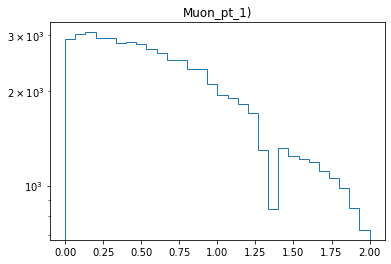

In [42]:
preprocessed_input  = preprocessing_input.transform(X_train)
plt.hist(preprocessed_input[:,6],bins=30,range=(0,2),histtype='step')
plt.yscale('log')
plt.title('Muon_pt_1)')
plt.show()

## Dealing with imbalanced classes

As promised we will now explain how to deal with the imbalance between the number of signal and background events. 
To deal with this we will create a simple dictionary called class_weights that will give a higher weightage to signal events( based on the ratio of signal to total events) specy the class weights when we train the model. 

In [43]:
class_weights = {0:len(y)/(y==0).sum(),
                 1:len(y)/(y==1).sum()
                 }

In [44]:
class_weights

{0: 1.1738329565607897, 1: 6.752649093615903}

### Now let us train our model

We will first use import a tool from keras called callbacks which will help the network to avoid overtraining using a method called early(Discussed in yesterdays lecture)

In [45]:
from keras import callbacks

In [46]:
Xt_train = preprocessing_input.transform(X_train)
Xt_test =preprocessing_input.transform(X_test)

Lets now train both the models

In [47]:
early_stopper = callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto")
model_check_point = callbacks.ModelCheckpoint("model_shallow.h5", monitor = 'val_loss', verbose=True, 
                                              save_best_only=True, mode='min')

    
print("Train now the shallow model ")
    
history_s = model_shallow.fit(
                Xt_train,
                y_train,
                batch_size=256,
                epochs=30,
                validation_split=0.2,
                callbacks=[early_stopper, model_check_point],class_weight=class_weights )

Train now the shallow model 
Train on 98698 samples, validate on 24675 samples
Epoch 1/30
98698/98698 [==============================] - 3s 32us/step - loss: 1.3905 - accuracy: 0.4848 - val_loss: 1.3719 - val_accuracy: 0.4411

Epoch 00001: val_loss improved from inf to 1.37195, saving model to model_shallow.h5
Epoch 2/30
98698/98698 [==============================] - 2s 23us/step - loss: 1.3386 - accuracy: 0.4741 - val_loss: 1.3161 - val_accuracy: 0.4843

Epoch 00002: val_loss improved from 1.37195 to 1.31614, saving model to model_shallow.h5
Epoch 3/30
98698/98698 [==============================] - 2s 23us/step - loss: 1.2710 - accuracy: 0.5557 - val_loss: 1.2451 - val_accuracy: 0.6001

Epoch 00003: val_loss improved from 1.31614 to 1.24513, saving model to model_shallow.h5
Epoch 4/30
98698/98698 [==============================] - 2s 24us/step - loss: 1.2063 - accuracy: 0.6452 - val_loss: 1.1880 - val_accuracy: 0.6906

Epoch 00004: val_loss improved from 1.24513 to 1.18804, saving mod

In [48]:
print("Train now the deep model ")


early_stopper = callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=True)
model_check_point = callbacks.ModelCheckpoint("model_deep.h5", monitor = 'val_loss', verbose=True, 
                                              save_best_only=True, mode='min')


history_d = model_deep.fit(
                Xt_train,
                y_train,
                batch_size=256,
                epochs=30,
                validation_split=0.2,
                callbacks=[early_stopper, model_check_point],class_weight=class_weights)
                

Train now the deep model 
Train on 98698 samples, validate on 24675 samples
Epoch 1/30
98698/98698 [==============================] - 6s 61us/step - loss: 1.0814 - accuracy: 0.7294 - val_loss: 0.9398 - val_accuracy: 0.8141

Epoch 00001: val_loss improved from inf to 0.93980, saving model to model_deep.h5
Epoch 2/30
98698/98698 [==============================] - 5s 46us/step - loss: 0.8986 - accuracy: 0.8114 - val_loss: 0.8821 - val_accuracy: 0.8069

Epoch 00002: val_loss improved from 0.93980 to 0.88209, saving model to model_deep.h5
Epoch 3/30
98698/98698 [==============================] - 5s 46us/step - loss: 0.8475 - accuracy: 0.8176 - val_loss: 0.8490 - val_accuracy: 0.8289

Epoch 00003: val_loss improved from 0.88209 to 0.84901, saving model to model_deep.h5
Epoch 4/30
98698/98698 [==============================] - 5s 48us/step - loss: 0.8183 - accuracy: 0.8228 - val_loss: 0.8276 - val_accuracy: 0.8284

Epoch 00004: val_loss improved from 0.84901 to 0.82761, saving model to model_

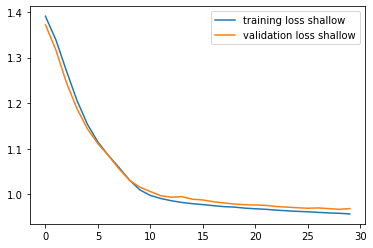

In [49]:
plt.plot(history_s.history["loss"], label="training loss shallow")
plt.plot(history_s.history["val_loss"], label="validation loss shallow")
plt.legend()
plt.show()

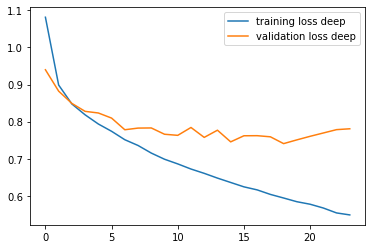

In [50]:
plt.plot(history_d.history["loss"], label="training loss deep")
plt.plot(history_d.history["val_loss"], label="validation loss deep")
plt.legend()
plt.show()

By using early stopping, the model wil halt its training if the validation loss does not improve over a specified number of epochs(called patience) 

In [51]:
from keras.models import load_model

In [52]:
model_shallow = load_model("model_shallow.h5")
model_deep = load_model("model_deep.h5")
preprocessing_input = pickle.load(open("HIGGS_preprocessing.pickle", "rb"))

### Now let us move on to the next step, Evaluating our trained model on test data

In [53]:
print('testing models using',X_test.shape[0],'events')

ntest_evts = X_test.shape[0]

testing models using 30844 events


In [54]:
Xt_test =preprocessing_input.transform(X_test)
Xt_train =preprocessing_input.transform(X_train)      

In [55]:
print('testing models using',X_test.shape[0],'events')

ntest_evts = X_test.shape[0]
#in case we want to use a smaller set of test data 
#num_events = 200000
predictions_shallow = model_shallow.predict(
        Xt_test)
predictions_deep = model_deep.predict(
        Xt_test)

testing models using 30844 events


#### Lets see what these predictions look like

In [56]:
predictions_deep

array([[2.3186207e-04],
       [2.1632820e-02],
       [2.8758645e-03],
       ...,
       [5.9521030e-06],
       [9.0237904e-01],
       [5.0505644e-01]], dtype=float32)

These are the output of our DNN model.It returns a value between one and zero with values close to zero(one) indicating they are more background(signal).

### Let us evaluate the performance of our DNN ploting the roc curve and calculting the area under the curve

In [57]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [58]:
fpr_shallow, tpr_shallow, _ = roc_curve(y_test, predictions_shallow)
fpr_deep, tpr_deep, _ = roc_curve(y_test, predictions_deep)

In [59]:
auc_shallow = auc(fpr_shallow, tpr_shallow)
auc_deep = auc(fpr_deep, tpr_deep)

print("AUC shallow model = ",auc_shallow)
print("AUC  deep model   = ",auc_deep)

AUC shallow model =  0.8517038622189348
AUC  deep model   =  0.922702337593232


### Lets now plot the roc curve

roc curve is basically the sensitivity vs specificity curve. Lets review what they mean(taken from wikipaedia) 

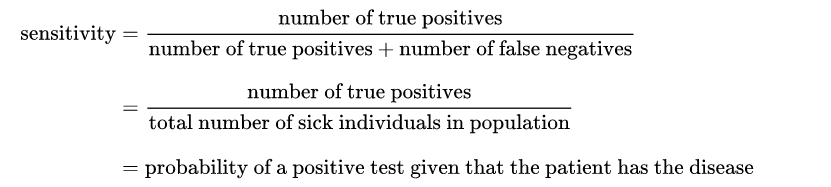


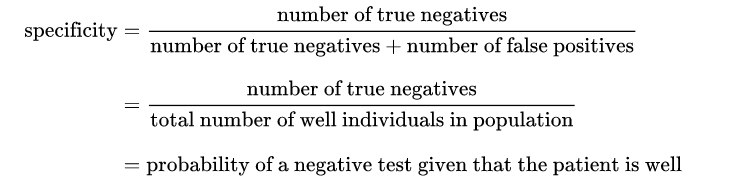

(0.0, 1.0)

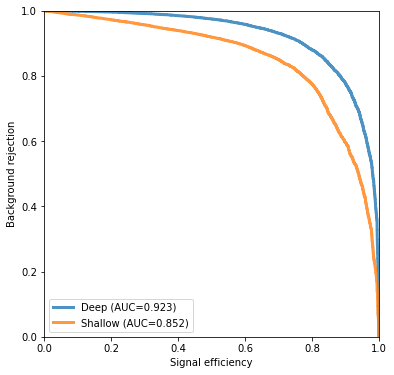

In [60]:
plt.figure(figsize=(6,6))
plt.plot(tpr_deep, 1.0-fpr_deep, lw=3, alpha=0.8,
        label="Deep (AUC={:.3f})".format(auc_deep))
plt.plot(tpr_shallow, 1.0-fpr_shallow, lw=3, alpha=0.8,
        label="Shallow (AUC={:.3f})".format(auc_shallow))
plt.xlabel("Signal efficiency")
plt.ylabel("Background rejection")
plt.legend(loc=3)
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
#plt.savefig("HIGGS_roc.png", bbox_inches="tight")

Now lets plot the roc curve for training events

In [61]:
predictions_shallow_tr = model_deep.predict((Xt_train))
predictions_deeptr = model_deep.predict((Xt_train))

In [62]:
fpr_shallow_tr, tpr_shallow_tr, _ = roc_curve(y_train, predictions_shallow_tr)
fpr_deep_tr, tpr_deep_tr, _ = roc_curve(y_train, predictions_deeptr)

In [63]:
auc_deep_tr = auc(fpr_deep_tr, tpr_deep_tr)
auc_shallow_tr = auc(fpr_shallow_tr, tpr_shallow_tr)

print("AUC shallow model training = ",auc_shallow_tr)
print("AUC  deep model training  = ",auc_deep_tr)

AUC shallow model training =  0.9455260387407275
AUC  deep model training  =  0.9455260387407275


In [64]:
bkg_score = model_deep.predict(Xt_train[y_train<0.5])[:,0]

In [65]:
sig_score = model_deep.predict(Xt_train[y_train>0.5])[:,0]

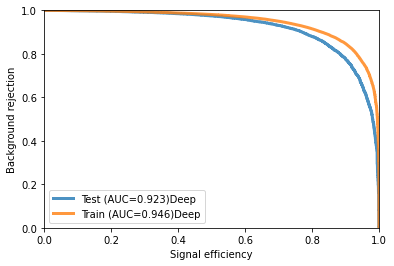

In [66]:
plt.plot(tpr_deep, 1.0-fpr_deep, lw=3, alpha=0.8,
        label="Test (AUC={:.3f})Deep".format(auc_deep))
plt.plot(tpr_deep_tr, 1.0-fpr_deep_tr, lw=3, alpha=0.8,
        label="Train (AUC={:.3f})Deep".format(auc_deep_tr))
plt.xlabel("Signal efficiency")
plt.ylabel("Background rejection")
plt.legend(loc=3)
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.savefig("HIGGS_roc.png", bbox_inches="tight")

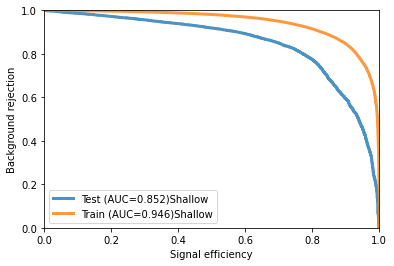

In [67]:
plt.plot(tpr_shallow, 1.0-fpr_shallow, lw=3, alpha=0.8,
        label="Test (AUC={:.3f})Shallow".format(auc_shallow))
plt.plot(tpr_shallow_tr, 1.0-fpr_shallow_tr, lw=3, alpha=0.8,
        label="Train (AUC={:.3f})Shallow".format(auc_shallow_tr))
plt.xlabel("Signal efficiency")
plt.ylabel("Background rejection")
plt.legend(loc=3)
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.savefig("HIGGS_roc_shallow.png", bbox_inches="tight")

In [68]:
def compare_train_test(clf, X_train, y_train, X_test, y_test, bins=20):
    decisions = []
    for X,y in ((Xt_train, y_train),(Xt_test, y_test)):
        
        d1 = clf.predict(X[y>=0.5]).ravel()
        d2 = clf.predict(X[y<0.5]).ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.hist(decisions[0],
             color='r', alpha=0.7, range=(0,1), bins=bins,
             histtype='step', density=True,
             label='S (train)')
    plt.hist(decisions[1],
             color='b', alpha=0.7, range=low_high, bins=bins,
             histtype='step', density=True,
             label='B (train)')

    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=(0,1), density=1)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale
    
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='none', c='r', label='S (test)')
    
    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, density=1)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    plt.errorbar(center, hist, yerr=err, fmt='none', c='b', label='B (test)')

    plt.xlabel("DNN output")
    plt.ylabel("Normalized units")
    plt.legend(loc='best')
    plt.savefig("DNNoutput.png", bbox_inches="tight")
    print(decisions[2])

[9.1815567e-01 5.6709129e-01 7.9630524e-02 ... 5.5026621e-01 7.3729903e-01
 5.9521030e-06]


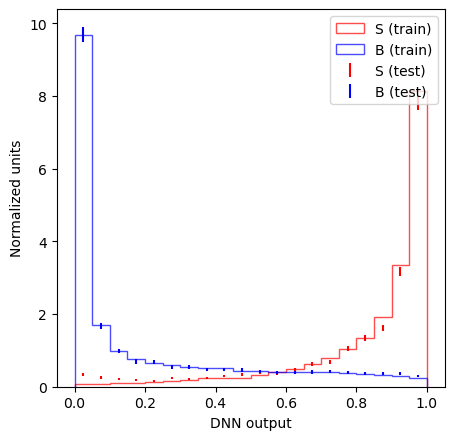

In [69]:
compare_train_test(model_deep,X_train,y_train,X_test,y_test)

[0.83950806 0.485946   0.29614282 ... 0.83636767 0.2750209  0.04992471]


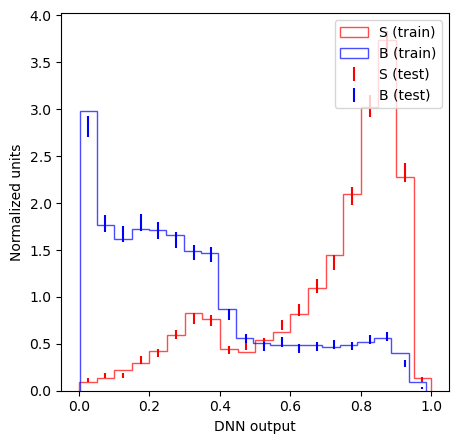

In [70]:
compare_train_test(model_shallow,X_train,y_train,X_test,y_test)

In [73]:
print(sklearn.__version__)

0.23.2


In [72]:
import sklearn